In [2]:
pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 MB 4.5 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 965.9 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [86]:
import torch
import torchvision
from torchvision import datasets,transforms

In [87]:
train = datasets.MNIST('',train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST('',train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

In [88]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [89]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [90]:
X,y = data

print(y)

tensor([0, 2, 5, 8, 6, 0, 5, 2, 8, 7])


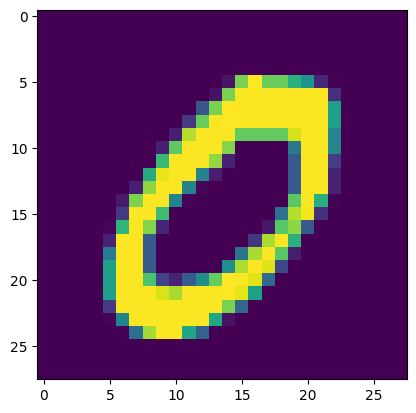

In [92]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28,28))
plt.show()

In [93]:
import torch.nn as nn

import torch.nn.functional as F

In [94]:
class Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return F.log_softmax(x,dim=1)


net = Net()

In [95]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001)

EPOCHS = 3

In [96]:
for epoch in range(EPOCHS):
    for data in trainset:
        X,y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)


tensor(0.1414, grad_fn=<NllLossBackward0>)
tensor(0.0208, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)


In [102]:
a = np.random.randn(28,28)
a = net(torch.Tensor(a).view(-1,28*28))

In [103]:
a

tensor([[-43.6735, -30.0382, -29.4983, -29.4749, -36.4846, -43.8699, -70.4139,
           0.0000, -39.4922, -23.3547]], grad_fn=<LogSoftmaxBackward0>)

In [38]:
correct = 0 
total = 0

with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view(-1,28*28))
        for idx,i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total+=1

print('Accuracy: ', round(correct/total,3))


Accuracy:  0.976


In [104]:
b =['Agam','Aastha']
list(enumerate(b))

[(0, 'Agam'), (1, 'Aastha')]

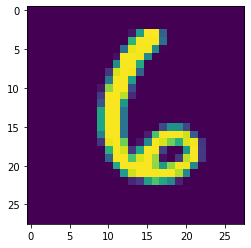

In [50]:
plt.imshow(X[7].view(28,28))
plt.show()

In [51]:
print('The number is: ' , torch.argmax(net(X[7].view(-1,28*28))))

The number is:  tensor(6)


In [60]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True

In [61]:
REBUILD_DATA = True # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        
                       

                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        if label == 'PetImages/Cat':

                            self.training_data.append([np.array(img), np.eye(2)[0]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])
                        elif label == 'PetImages/Dog':
    
                            self.training_data.append([np.array(img), np.eye(2)[1]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)
        return self.training_data

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    training_data = dogsvcats.make_training_data()
    print('done')

PetImages/Cat


100%|██████████| 12501/12501 [00:10<00:00, 1230.18it/s]


PetImages/Dog


100%|██████████| 12501/12501 [00:11<00:00, 1122.38it/s]

Cats: 12476
Dogs: 12470
done


array([0., 1.])

In [62]:
print(training_data[0])

[array([[165, 171, 172, ..., 115, 101, 102],
       [165, 166, 172, ..., 131, 115, 114],
       [178, 181, 182, ..., 135, 122, 114],
       ...,
       [ 76,  88,  80, ...,  63,  64,  62],
       [ 66,  89,  67, ...,  71,  73,  63],
       [ 61,  75,  52, ...,  72,  77,  46]], dtype=uint8), array([0., 1.])]


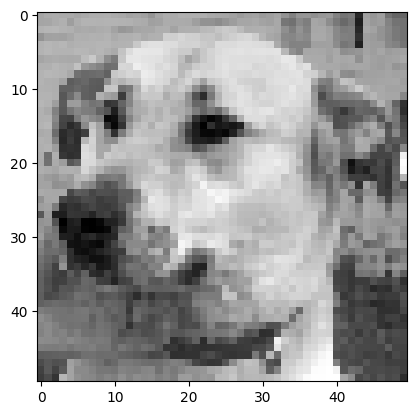

In [63]:
import matplotlib.pyplot as plt


plt.imshow(training_data[0][0], cmap='gray')
plt.show()

In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
        self.fc1 = nn.Linear(512,512)
        self.fc2 = nn.Linear(512,2)

        # x = torch.radn(50,50).view(-1,1,50,50)
        # self._to_linear = None
        # self.convs(x)

    def convs(self,x):
            x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
            x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
            x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))

            # if self._to_linear is None:
            #     self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
            return x

    def forward(self,x):
            x = self.convs(x)
            x = x.view(-1,512)
            x = F.relu(self.fc1(x))
            x = self.fc2(x)
            return F.softmax(x, dim=1)

net = Net()

        


In [65]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1

val_size = int(len(X)*VAL_PCT)
print(val_size)

2494


In [66]:
train_X = X[:-1*val_size]
train_y = y[:-1*val_size]

test_X = X[-1*val_size:]
test_y = y[-1*val_size:]

print(len(train_X))
print(len(test_X))

22452
2494


In [67]:
BATCH_SIZE = 100
EPOCHS = 6

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        #print(f"{i}:{i+BATCH_SIZE}")
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]

        net.zero_grad()

        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()    # Does the update

    print(f"Epoch: {epoch}. Loss: {loss}")

100%|██████████| 225/225 [00:29<00:00,  7.69it/s]


Epoch: 0. Loss: 0.21343980729579926


100%|██████████| 225/225 [00:28<00:00,  7.92it/s]


Epoch: 1. Loss: 0.18305356800556183


100%|██████████| 225/225 [00:28<00:00,  7.95it/s]


Epoch: 2. Loss: 0.1615036427974701


100%|██████████| 225/225 [00:28<00:00,  7.90it/s]


Epoch: 3. Loss: 0.13670027256011963


100%|██████████| 225/225 [00:28<00:00,  7.85it/s]


Epoch: 4. Loss: 0.10533849149942398


100%|██████████| 225/225 [00:29<00:00,  7.66it/s]


Epoch: 5. Loss: 0.0898260697722435


In [71]:
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1,1,50,50))[0]
        predicted_class = torch.argmax(net_out)
        if predicted_class == real_class:
            correct+=1
        total+=1

print('Accuracy: ', round(correct/total,3))

100%|██████████| 2494/2494 [00:01<00:00, 2079.18it/s]

Accuracy:  0.749


In [74]:
img_cat = cv2.imread('kit.jpg', cv2.IMREAD_GRAYSCALE)
img_cat = cv2.resize(img_cat, (50, 50))
img_cat = torch.Tensor(np.array(img_cat)).view(-1,1,50,50)

img_dog = cv2.imread('img_dog.jpeg', cv2.IMREAD_GRAYSCALE)
img_dog = cv2.resize(img_dog, (50, 50))
img_dog = torch.Tensor(np.array(img_dog)).view(-1,1,50,50)

In [78]:
with torch.no_grad():
    output = net(img_cat)
output

tensor([[0., 1.]])

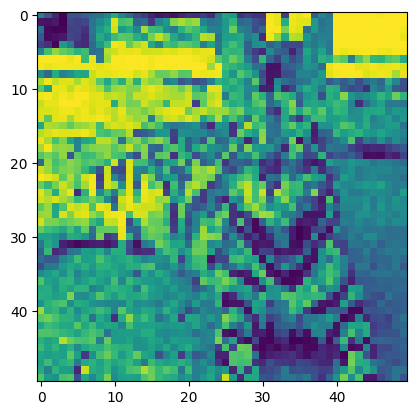

In [76]:
plt.imshow(img_cat.view(50,50))